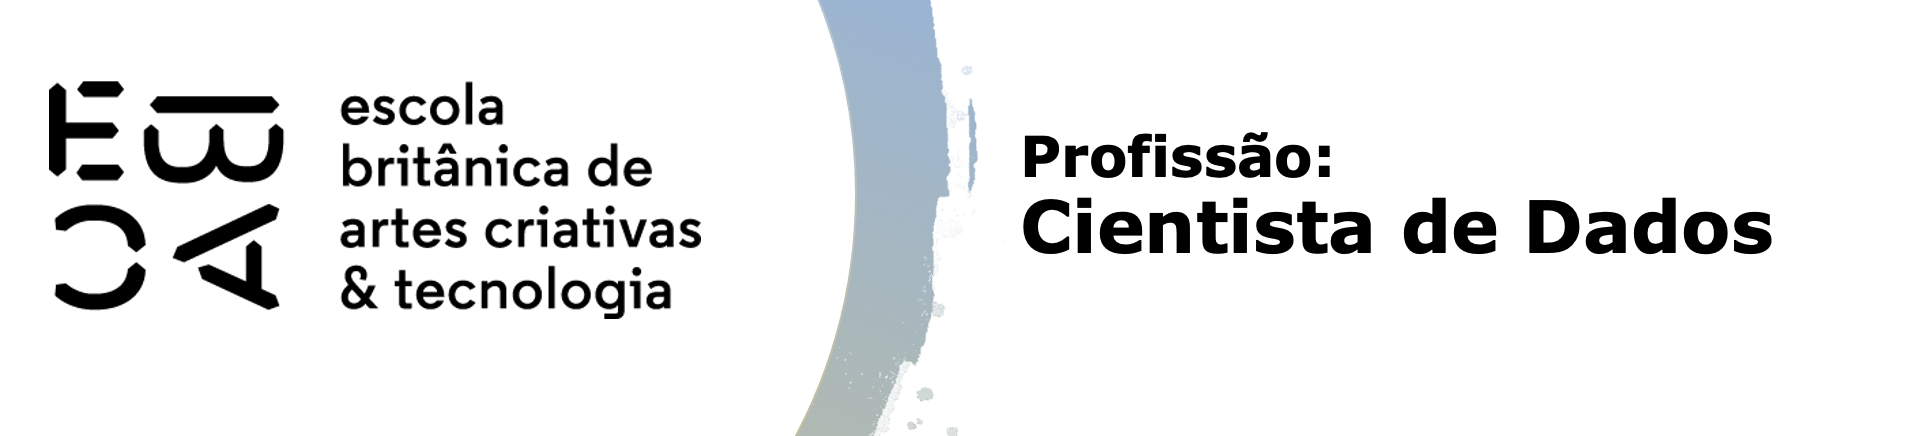

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [20]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [9]:
# Carregar X_train, Y_train, X_test, Y_test
X_train = pd.read_csv(r"C:\Users\vinic\Exercicios\M17\X_train_selected.csv", index_col=0)  # Certifique-se de ajustar o caminho do arquivo
Y_train = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\train\y_train.txt', index_col=0)
X_test = pd.read_csv(r"C:\Users\vinic\Exercicios\M17\X_test_selected.csv", index_col=0)
Y_test = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\test\y_test.txt', index_col=0)

# Verificar as primeiras linhas para garantir que as bases foram carregadas corretamente
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())

         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  subject.1
subject                                                                    
1                 0.288585          -0.020294          -0.132905          1
1                 0.278419          -0.016411          -0.123520          1
1                 0.279653          -0.019467          -0.113462          1
1                 0.279174          -0.026201          -0.123283          1
1                 0.276629          -0.016570          -0.115362          1
Empty DataFrame
Columns: []
Index: [5, 5, 5, 5, 5]
         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  subject.1
subject                                                                    
2                 0.257178          -0.023285          -0.014654          2
2                 0.286027          -0.013163          -0.119083          2
2                 0.275485          -0.026050          -0.118152          2
2                 0.270298          -

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [16]:

# Definir a pasta onde os arquivos estão localizados
data_folder = "UCI HAR Dataset"

# Carregar os dados
X_train = pd.read_csv("X_train_selected.csv", index_col=0)
Y_train = pd.read_csv(os.path.join(data_folder, "train", "y_train.txt"), header=None, names=["activity"])
X_test = pd.read_csv("X_test_selected.csv", index_col=0)
Y_test = pd.read_csv(os.path.join(data_folder, "test", "y_test.txt"), header=None, names=["activity"])

# Dividir a base de treino em treino e validação (75% treino, 25% validação)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Ajustar árvore de decisão com profundidade máxima igual a 4
decision_tree_full = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree_full.fit(X_train, Y_train)

# Obter importância das variáveis
feature_importances = decision_tree_full.feature_importances_
feature_names = X_train.columns

# Selecionar as 3 variáveis mais importantes
important_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)[:3]
important_feature_names = [feature[0] for feature in important_features]

print("Três variáveis mais importantes:", important_feature_names)

# Ajustar árvore de decisão com min_samples_leaf=20 usando apenas as 3 variáveis mais importantes
X_train_selected = X_train[important_feature_names]
X_val_selected = X_val[important_feature_names]
X_test_selected = X_test[important_feature_names]

decision_tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
decision_tree.fit(X_train_selected, Y_train)

# Calcular ccp_alphas
path = decision_tree.cost_complexity_pruning_path(X_train_selected, Y_train)
ccp_alphas = np.unique(path.ccp_alphas[path.ccp_alphas > 0])

# Selecionar apenas 1 a cada 5 valores de ccp_alpha
ccp_alphas_subset = ccp_alphas[::5]

print("Valores de ccp_alpha selecionados:", ccp_alphas_subset)

Três variáveis mais importantes: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
Valores de ccp_alpha selecionados: [9.70046647e-06 7.15114946e-05 1.12305284e-04 1.74102968e-04
 2.09119319e-04 2.15209769e-04 2.32985960e-04 2.44611650e-04
 2.78511840e-04 3.01561638e-04 3.09707079e-04 3.17562251e-04
 3.49182342e-04 3.56777944e-04 3.87805822e-04 4.09865796e-04
 4.28702346e-04 4.42384384e-04 4.67084355e-04 4.92197656e-04
 5.30811767e-04 5.66580681e-04 5.97036652e-04 6.61246357e-04
 6.72674860e-04 7.45483191e-04 9.02027507e-04 1.01657158e-03
 1.32034174e-03 1.45336392e-03 1.93582859e-03 2.44366701e-03
 3.33963650e-03 4.52695015e-03 5.92471885e-03]


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [22]:
# Medir tempo de execução
time_start = time.time()

# Configurar Grid Search com validação cruzada k-fold (k=10)
param_grid = {"ccp_alpha": ccp_alphas_subset}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_selected, Y_train)

# Medir tempo de execução
time_end = time.time()
print(f"Tempo de execução do Grid Search: {time_end - time_start:.2f} segundos")

# Melhor parâmetro
tree_best = grid_search.best_estimator_
print(f"Melhor ccp_alpha: {grid_search.best_params_['ccp_alpha']}")
print(f"Melhor acurácia na base de validação cruzada: {grid_search.best_score_}")

# Avaliar no conjunto de teste
acc_test = accuracy_score(Y_test, tree_best.predict(X_test_selected))
print(f"Acurácia no conjunto de teste: {acc_test}")

Tempo de execução do Grid Search: 8.92 segundos
Melhor ccp_alpha: 0.0006726748597266005
Melhor acurácia na base de validação cruzada: 0.46318814277071985
Acurácia no conjunto de teste: 0.44350186630471666


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

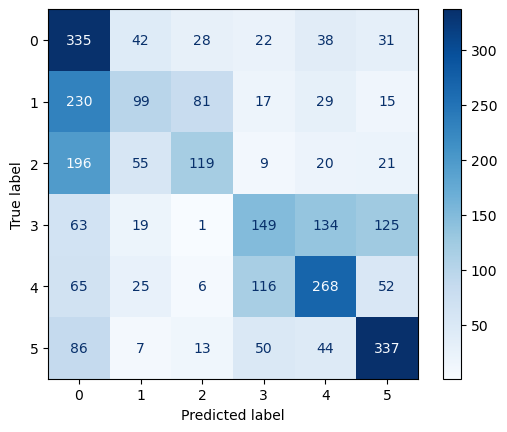

In [24]:
# Visualizar matriz de confusão
y_pred = tree_best.predict(X_test_selected)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

Classe com maior erro: 2
Três novas variáveis mais importantes: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
Acurácia após adição de novas variáveis: 0.42992874109263657


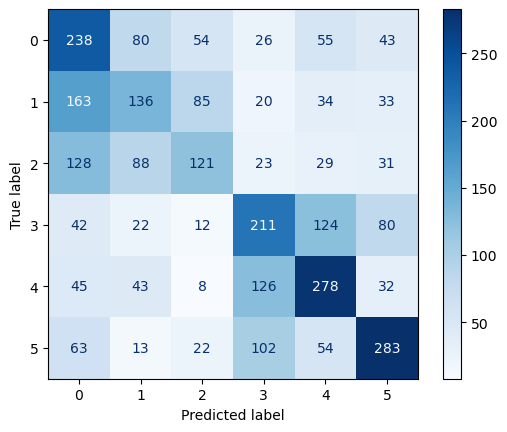

In [26]:
# Identificar a classe com maior erro
errors = cm.sum(axis=1) - np.diag(cm)
worst_class = np.argmax(errors) + 1  # +1 porque os índices começam em 0
print(f"Classe com maior erro: {worst_class}")

# Criar variável binária para essa classe
Y_train_bin = (Y_train["activity"] == worst_class).astype(int)
Y_test_bin = (Y_test["activity"] == worst_class).astype(int)

# Ajustar árvore de decisão para essa variável
decision_tree_bin = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
decision_tree_bin.fit(X_train, Y_train_bin)

# Obter importância das variáveis para essa nova árvore
feature_importances_bin = decision_tree_bin.feature_importances_
important_features_bin = sorted(zip(feature_names, feature_importances_bin), key=lambda x: x[1], reverse=True)[:3]
important_feature_names_bin = [feature[0] for feature in important_features_bin]

print("Três novas variáveis mais importantes:", important_feature_names_bin)

# Criar novo conjunto de dados com as variáveis mais importantes antigas e novas
final_features = list(set(important_feature_names + important_feature_names_bin))
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Treinar nova árvore com as melhores variáveis
tree_final = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree_final.fit(X_train_final, Y_train)

# Avaliar nova árvore
acc_final = accuracy_score(Y_test, tree_final.predict(X_test_final))
print(f"Acurácia após adição de novas variáveis: {acc_final}")

# Matriz de confusão da nova árvore
y_pred_final = tree_final.predict(X_test_final)
cm_final = confusion_matrix(Y_test, y_pred_final)
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final)
disp_final.plot(cmap=plt.cm.Blues)
plt.show()
